### Q1: Write a method called Con2D(img,kernel), which takes an image and kernel as input that performs convolution of the img with kernel. Return the output image from the method. You must write your own implementation for this method without using any library.

In [1]:
# import necessary library
import statistics
import matplotlib.pyplot as plt
# for computer vision operations
import cv2 as cv
#for conversion 
import numpy as np
import cv2

In [2]:
# for read image
img  = plt.imread("shoaib1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

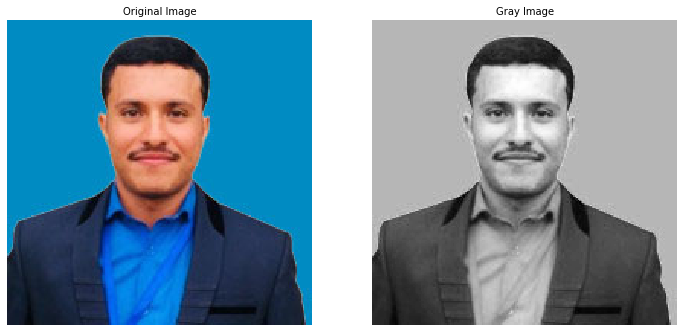

In [3]:
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(gray,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gray Image',fontsize='medium')
plt.show()

In [4]:
# Shape of Original Image
img.shape

(200, 200, 3)

In [5]:
# Shape of gray Image
gray.shape

(200, 200)

In [6]:
#Conversion numpy to list
Img_Matrix = gray.tolist()

In [7]:
# Intilize Kernal
#Kernal_np = np.random.randint(1, 7, size=(3, 3))
#Conversion numpy to list
#Kernal = Kernal_np.tolist()
#Kernal

In [8]:
#Kernal = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

In [9]:
Kernal = [[0,-1,0],[-1,5,-1],[0,-1,0]]

### Convolution Function

In [10]:
def Con2D(imag, Kernal):
    # Assignmnet
    Img_Matrix = imag
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])
    
    #*****ADD PADDING ARROUNS IMAGE********
    # Loop for row
    for i in range(len(Img_Matrix)+1):
        # intilize 1D row
        row=[]
        # Add padding at strat of matrix
        if i==0:
            # loop for column
            for j in range(len(Img_Matrix[i])):
                # Append 0 value in row
                row.append(0)
            # Insert row in orignal image matres at start
            Img_Matrix.insert(0,row)
        # Add padding at end of matrix
        if i== len(Img_Matrix)-1:
            # Add padding at strat  and end of matrix in each row
            L=len(Img_Matrix[i])+2
            for j in range(L):
                # Append 0 value in row
                row.append(0)
            # Insert 0 in orignal image matres at end of each row
            Img_Matrix.insert(i+1,row)
        # Insert 0 in orignal image matres at start of each row    
        Img_Matrix[i].insert(0,0)
        # Append padding in rignal matrix row
        Img_Matrix[i].append(0)
    #***************************************
    # Intillize Array or list
    Final_Image = []
    # loop for row
    for i in range(0,rows):
        # intilize 1d row
        row = []
        # loop for column
        for j in range(0,col):
            # intilize sum variable
            sum = 0
            # loop control for kenal row
            for k in range(len(Kernal)):
                # loop for kernal column
                for l in range(len(Kernal[k])):
                    # sum of dot product between kernal and eaxh pixal value of matrix
                    sum = sum + (Kernal[k][l] *  Img_Matrix[i+k][j+l])
            # append value of sem in row
            row.append(sum)
        # append 1D row in new image construction
        Final_Image.append(row)
    # returm updated image
    return Final_Image
    

### Function Calling

In [11]:
Final_Image = [[]] 
Final_Image =  Con2D(Img_Matrix , Kernal)

In [12]:
# convort matrix to numpay 
FM = np.array(Final_Image )
FM.shape

(200, 200)

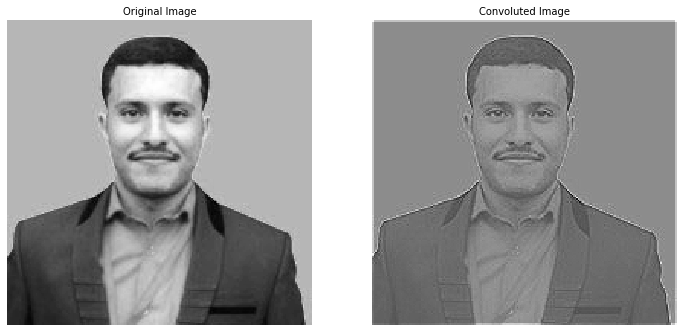

In [13]:
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(FM,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Convoluted Image',fontsize='medium')
plt.show()

### Question 2. Write a method NonlinearFilter(img,type=”median”), it takes image as input parameter and 2nd parameter must be a string that specifies the kind of non-linear filter to apply. By default it is median. It can be Max, Min. You must provide your own implementation of the method without using any library for this method.

In [47]:
# for read image
img  = plt.imread("PICC.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape
#Conversion numpy to list
Img_Matrix = gray.tolist()

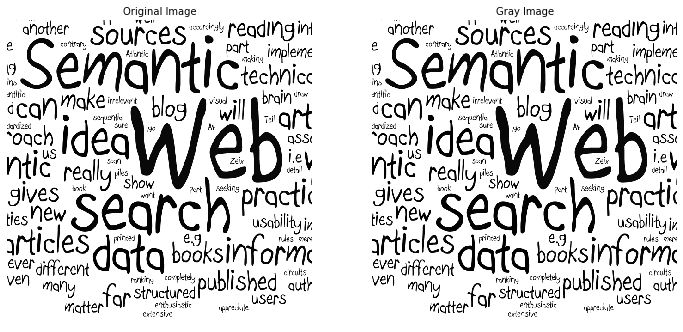

(660, 660)

In [48]:
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(gray,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gray Image',fontsize='medium')
plt.show()
gray.shape

### Function For Find Generate_max_med_image

In [49]:
def generate_max_med_image(rows,col,array,Kernal,globel_max):     
    Point = -1
    for i in range(0,rows):
        for j in range(0,col):
            for k in range(0,Kernal):
                for l in range(0,Kernal):
                    if k==1 and l==1:
                        Point = Point+1
                        array[i+k][j+l] = globel_max[Point]
    return array

### Define NonlinearFilter

In [50]:
def NonlinearFilter(Img_Matrix,type="median"):
    import statistics
    rows = len(Img_Matrix)-2
    # find number of column
    col = len(Img_Matrix[0])-2
    #filter of window size
    Kernal = 3
    array = Img_Matrix 
    # store for min effected image
    Min_Image = []
    # store for max effected image
    Max_Image = []
    # store for medin effected image
    Medin_Image = []
    # store for max extrected values
    globel_max = []
    # store for medin extrected values
    globel_medin = []
    # for rows
    for i in range(0,rows):
        row = []
        # for column
        for j in range(0,col):
            row = []
            # for store min
            Max = 0
            # for store max
            Min = 0
            # for store medin
            Medin = 0
            # for row of window
            for k in range(0,Kernal):
                # for colum of window
                for l in range(0,Kernal):
                    # store extracted value in row
                    row.append(array[i+k][j+l])
            # find min from selected values
            Min=min(row)
            # find max from selected values
            Max=max(row)
            # find medin from selected values
            Medin=round(statistics.median(row))
            # store max values in array
            globel_max.append(Max)
            # store medin values in array
            globel_medin.append(Medin)
            #print(Medin)
            # for rows
            for k in range(0,Kernal):
                # for column
                for l in range(0,Kernal):
                    # condition for replacement min
                    if k==1 and l==1:
                        # replacement of min
                        array[i+k][j+l] = Min
    # final image effected by min
    Min_Image = array
    # for MAX
    Max_Image  = generate_max_med_image(rows,col,array,Kernal,globel_max)
    Medin_Image = generate_max_med_image(rows,col,array,Kernal,globel_medin)
    return(Min_Image, Max_Image, Medin_Image)
    

### Function Calling

In [55]:
Final_Image1, Final_Image2, Final_Image3   =   NonlinearFilter(Img_Matrix)

### Representation 

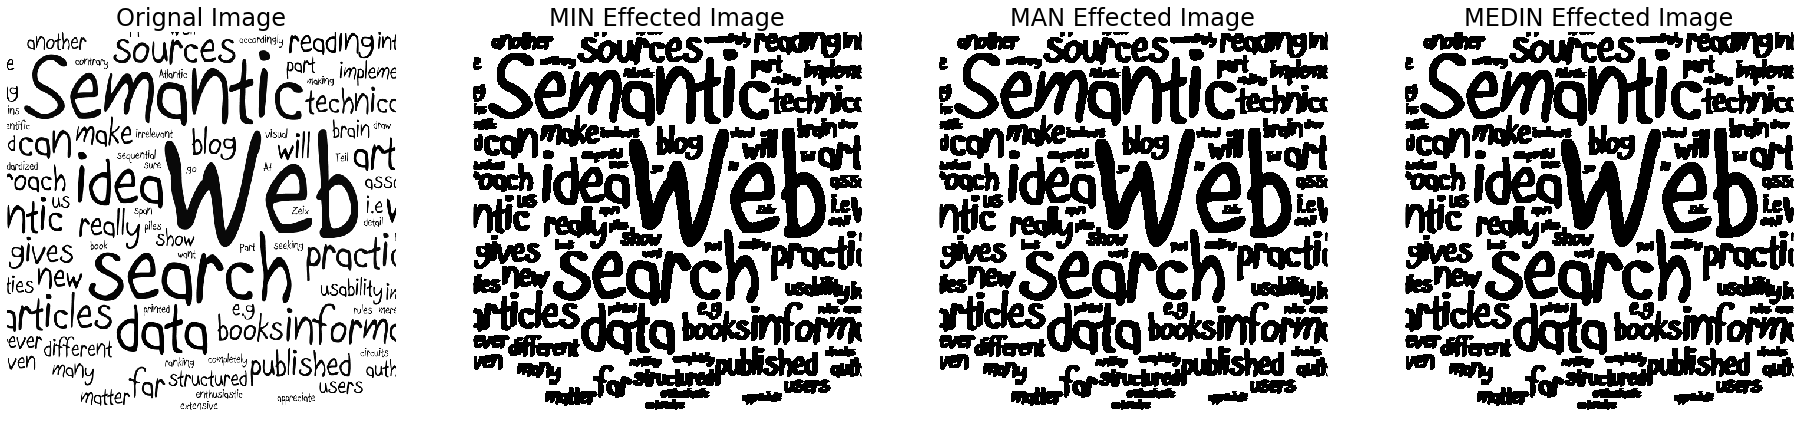

In [56]:
FMIN = np.array(Final_Image1)
FMAX = np.array(Final_Image2)
FMAD = np.array(Final_Image3)
# define loop for fram
fig, axs = plt.subplots(1,4,figsize=(32,32))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Orignal Image',fontsize='24')
axs[1].imshow(FMIN,cmap='gray')
axs[1].axis('off')
axs[1].set_title('MIN Effected Image',fontsize='24')
# presented inverse image
axs[2].imshow(FMAX,cmap='gray')
axs[2].axis('off')
axs[2].set_title('MAN Effected Image',fontsize='24')
# presented inverse image
axs[3].imshow(FMAD,cmap='gray')
axs[3].axis('off')
axs[3].set_title('MEDIN Effected Image',fontsize='24')
plt.show()

### Q3: Write your own method to implement first and 2nd derivative of image. You must not use any library.

In [20]:
# for read image
img  = plt.imread("shoaib1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Conversion numpy to list
Img_Matrix = gray.tolist()

### Function for Add Padding

In [21]:
def Add_Padding(Img_Matrix):
    for i in range(len(Img_Matrix)+1):
        # intilize 1D row
        row=[]
        # Add padding at strat of matrix
        if i==0:
            # loop for column
            for j in range(len(Img_Matrix[i])):
                # Append 0 value in row
                row.append(0)
            # Insert row in orignal image matres at start
            Img_Matrix.insert(0,row)
        # Add padding at end of matrix
        if i== len(Img_Matrix)-1:
            # Add padding at strat  and end of matrix in each row
            L=len(Img_Matrix[i])+2
            for j in range(L):
                # Append 0 value in row
                row.append(0)
            # Insert 0 in orignal image matres at end of each row
            Img_Matrix.insert(i+1,row)
        # Insert 0 in orignal image matres at start of each row    
        Img_Matrix[i].insert(0,0)
        # Append padding in rignal matrix row
        Img_Matrix[i].append(0)
    return Img_Matrix
    

### Function for First_Derivative_Verical

In [22]:
def First_Derivative_Verical(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])-2
    Vertical_first_Image = []
    # loop for row
    for i in range(1,rows-1):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(0,col):
            first = Img_Matrix[i][j+1] - Img_Matrix[i][j]
            first_D.append(first)
            #print(first)
        Vertical_first_Image.append(first_D)
    return Vertical_first_Image

### Function for First_Derivative_Horizontal

In [23]:
def First_Derivative_Horizontal(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])
    Horzontal_first_Image = []
    # loop for row
    for i in range(0,rows-2):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(1,col-1):
            first = Img_Matrix[i+1][j] - Img_Matrix[i][j]
            first_D.append(first)
        Horzontal_first_Image.append(first_D)
    return Horzontal_first_Image

### Function for Second_Derivative_Verical

In [24]:
def Second_Derivative_Verical(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])-1
    Vertical_first_Image = []
    # loop for row
    for i in range(1,rows-1):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(0,col-1):
            first = (Img_Matrix[i][j+2] + Img_Matrix[i][j] - 2*(Img_Matrix[i][j+1]))
            first_D.append(first)
        Vertical_first_Image.append(first_D)
    return Vertical_first_Image

### Function for Second_Derivative_Horizontal

In [25]:
def Second_Derivative_Horizontal(Img_Matrix):

    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])
    Horzontal_first_Image = []
    # loop for row
    for i in range(0,rows-2):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(1,col-1):
            first = (Img_Matrix[i][j] + Img_Matrix[i+2][j] - 2*(Img_Matrix[i+1][j]))
            first_D.append(first)
        Horzontal_first_Image.append(first_D)
    return Horzontal_first_Image

### Function call for Padding

In [26]:
# For add padding
Img_Matrix = Add_Padding(Img_Matrix)

### Function call for first Der in Vertical way

In [27]:
# First_Derivative_Verical direction
Vertical_first_Image = First_Derivative_Verical(Img_Matrix)
FVI = np.array(Vertical_first_Image)

### Function call for first Der in Horizontal way

In [28]:
Horzontal_first_Image = First_Derivative_Horizontal(Img_Matrix)
FHI = np.array(Horzontal_first_Image)

### Function call for Second Der in Vertical way

In [29]:
Vertical_Second_Image = Second_Derivative_Verical(Img_Matrix)
SVI = np.array(Vertical_Second_Image)

### Function call for Second Der in Horizontal way

In [30]:
Horizontal_Second_Image = Second_Derivative_Horizontal(Img_Matrix)
SHI = np.array(Horizontal_Second_Image)

### For Representation

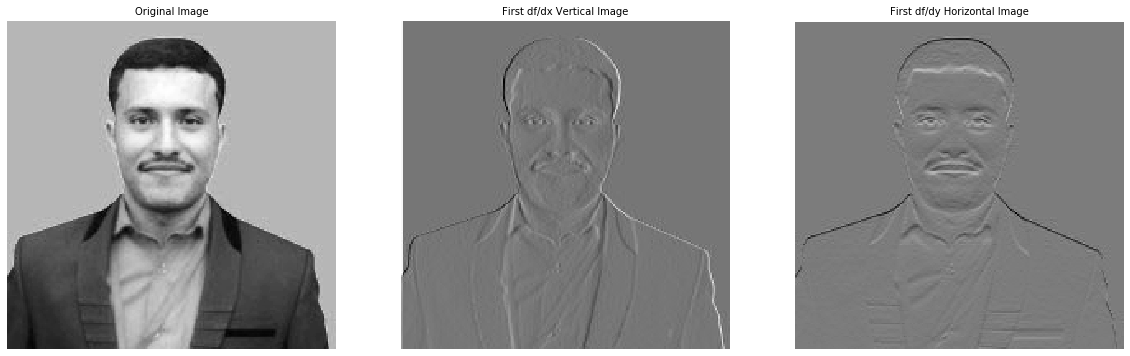

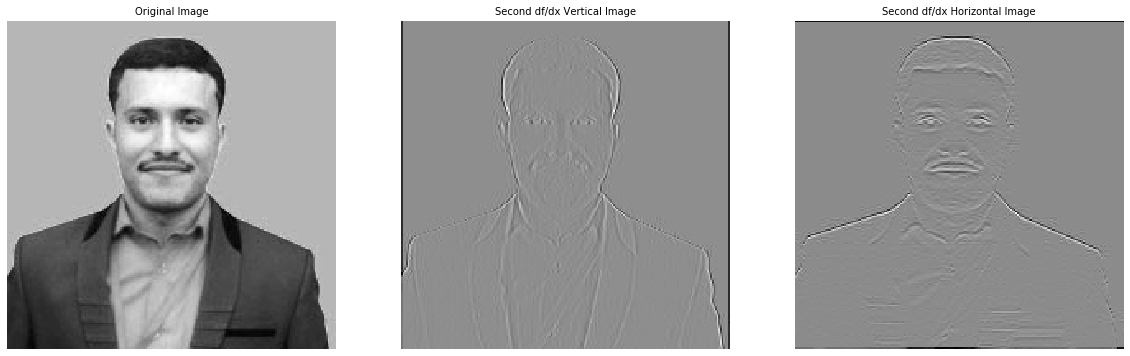

In [31]:
# define loop for fram
fig, axs = plt.subplots(1,3,figsize=(20,20))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# First df/dx Vertical Image
axs[1].imshow(FVI,cmap='gray')
axs[1].axis('off')
axs[1].set_title('First df/dx Vertical Image',fontsize='medium')
# First df/dy Horixontal Image
axs[2].imshow(FHI,cmap='gray')
axs[2].axis('off')
axs[2].set_title('First df/dy Horizontal Image',fontsize='medium')
plt.show()
fig, axs = plt.subplots(1,3,figsize=(20,20))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
axs[1].imshow(SVI,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Second df/dx Vertical Image',fontsize='medium')
axs[2].imshow(SHI,cmap='gray')
axs[2].axis('off')
axs[2].set_title('Second df/dx Horizontal Image',fontsize='medium')
plt.show()

### Q4: Write a method to find gradient magnitude and orientations. You must use your won method without using any library.

In [32]:
from math import pow
import math 
# for read image
img  = plt.imread("shoaib1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Conversion numpy to list
Img_Matrix = gray.tolist()

### Function call for Padding

In [33]:
def Add_Padding(Img_Matrix):
    for i in range(len(Img_Matrix)+1):
        # intilize 1D row
        row=[]
        # Add padding at strat of matrix
        if i==0:
            # loop for column
            for j in range(len(Img_Matrix[i])):
                # Append 0 value in row
                row.append(0)
            # Insert row in orignal image matres at start
            Img_Matrix.insert(0,row)
        # Add padding at end of matrix
        if i== len(Img_Matrix)-1:
            # Add padding at strat  and end of matrix in each row
            L=len(Img_Matrix[i])+2
            for j in range(L):
                # Append 0 value in row
                row.append(0)
            # Insert 0 in orignal image matres at end of each row
            Img_Matrix.insert(i+1,row)
        # Insert 0 in orignal image matres at start of each row    
        Img_Matrix[i].insert(0,0)
        # Append padding in rignal matrix row
        Img_Matrix[i].append(0)
    return Img_Matrix
    

### Function for first Der in Vertical way

In [34]:
def First_Derivative_Verical(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])-2
    Vertical_first_Image = []
    # loop for row
    for i in range(1,rows-1):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(0,col):
            first = Img_Matrix[i][j+1] - Img_Matrix[i][j]
            first_D.append(first)
            #print(first)
        Vertical_first_Image.append(first_D)
    return Vertical_first_Image

### Function for First_Derivative_Horizontal

In [35]:
def First_Derivative_Horizontal(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])
    Horzontal_first_Image = []
    # loop for row
    for i in range(0,rows-2):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(1,col-1):
            first = Img_Matrix[i+1][j] - Img_Matrix[i][j]
            first_D.append(first)
        Horzontal_first_Image.append(first_D)
    return Horzontal_first_Image

### Function call for Padding

In [36]:
# For add padding
Img_Matrix = Add_Padding(Img_Matrix)

### Function call for first Der in Vertical way

In [37]:
# First_Derivative_Verical direction
Vertical_first_Image = First_Derivative_Verical(Img_Matrix)
FVI = np.array(Vertical_first_Image)
FVI.shape

(200, 200)

### Function call for first Der in Horizontal way

In [38]:
Horzontal_first_Image = First_Derivative_Horizontal(Img_Matrix)
FHI = np.array(Horzontal_first_Image)
FHI.shape

(200, 200)

### Gradient Magnitude and Orientation

In [39]:
def fun_gradient_magnitude_orientation(Vertical_first_Image, Horzontal_first_Image):
    gradient_magnitude = []
    orientation = []

    for i in range(len(Vertical_first_Image)):
        GM_Row = []
        OR_Row = []
        for j in range(len(Vertical_first_Image[0])):
            GM_Row.append(round(math.sqrt(int(pow(Vertical_first_Image[i][j],2) + pow(Horzontal_first_Image[i][j],2)))))
            if Vertical_first_Image[i][j]==0:
                OR_Row.append(0)
            else:
                OR_Row.append(round(math.degrees(math.atan(round(Horzontal_first_Image[i][j] / Vertical_first_Image[i][j])))))
        gradient_magnitude.append(GM_Row)
        orientation.append(OR_Row)
    return gradient_magnitude, orientation

### Function Call for Gradient Magnitude and Orientation

In [40]:
gradient_magnitude, orientation = fun_gradient_magnitude_orientation(Vertical_first_Image, Horzontal_first_Image)

### Representation

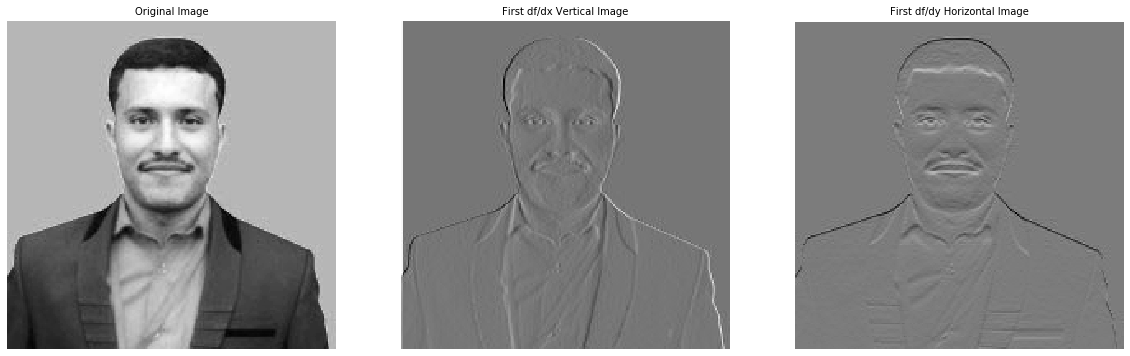

In [41]:
# define loop for fram
fig, axs = plt.subplots(1,3,figsize=(20,20))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# First df/dx Vertical Image
axs[1].imshow(FVI,cmap='gray')
axs[1].axis('off')
axs[1].set_title('First df/dx Vertical Image',fontsize='medium')
# First df/dy Horixontal Image
axs[2].imshow(FHI,cmap='gray')
axs[2].axis('off')
axs[2].set_title('First df/dy Horizontal Image',fontsize='medium')
plt.show()

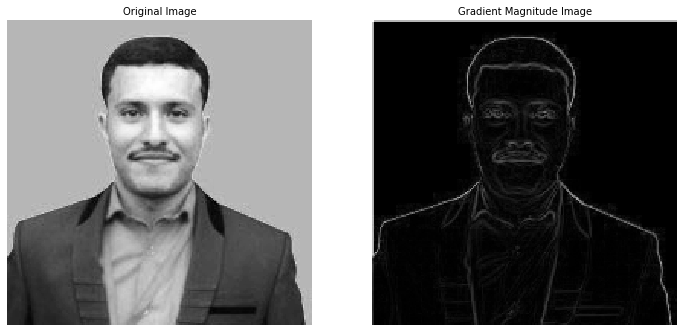

In [42]:
# for read image
FGM = np.array(gradient_magnitude)
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(FGM,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gradient Magnitude Image',fontsize='medium')
plt.show()

## Orientations.

In [43]:
print(orientation)

[[45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

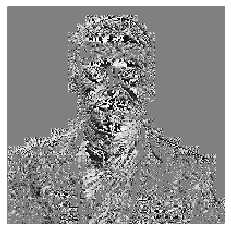

In [44]:
# for read image
FGM = np.array(orientation)
plt.imshow(FGM,cmap='gray')
# for hide axis
plt.axis('off')
# for show image
plt.show()